<a href="https://colab.research.google.com/github/Air-pollution-and-COVID-19/CDMX/blob/master/graficos_contaminantes_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importación de librerías
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib.dates import date2num, num2date, datetime
from matplotlib import rcParams as rcp

In [3]:
#tamaño de letra elegido
rcp['font.size'] = 15.
rcp['lines.linewidth'] = 2.
rcp['font.family'] = 'sans'

In [4]:
#documentos con los datos necesarios de CDMX
!git clone https://github.com/cdcmx2020a/group_A_AlmaJair.git

Cloning into 'group_A_AlmaJair'...
remote: Enumerating objects: 297, done.
remote: Counting objects: 100% (297/297), done.
remote: Compressing objects: 100% (227/227), done.
remote: Total 297 (delta 114), reused 215 (delta 65), pack-reused 0
Receiving objects: 100% (297/297), 43.24 MiB | 27.25 MiB/s, done.
Resolving deltas: 100% (114/114), done.


In [5]:
!git clone https://github.com/Air-pollution-and-COVID-19/CDMX

Cloning into 'CDMX'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 162 (delta 15), reused 0 (delta 0), pack-reused 120
Receiving objects: 100% (162/162), 4.55 MiB | 8.92 MiB/s, done.
Resolving deltas: 100% (56/56), done.


In [14]:
#Obtención de casos en CDMX
mat = np.loadtxt('/content/CDMX/casos_diarios/diario_estado_cdmx.csv',delimiter=',') 


In [15]:
# Día de CDMX, configuración
time = mat[0,:]
str(mat[0,0])

'12012020.0'

In [16]:
#número de casos en la CDMX
cases_ciudad = mat[1,:] 

In [17]:
# formato de mes/día/año
time_final_ct = np.zeros(time.shape[0])
for ii in range(time.shape[0]):
    if np.ma.is_masked(time[ii]) == False:
        if len(str(time[ii])) == 10:
            time_final_ct[ii] = date2num(datetime.datetime(np.int(str(time[ii])[4:-2]), np.int(str(time[ii])[2:4]), np.int(str(time[ii])[0:2])))
        else:
            time_final_ct[ii] = date2num(datetime.datetime(np.int(str(time[ii])[3:-2]), np.int(str(time[ii])[1:3]),
                                                            np.int(str(time[ii])[0:1])))
                
                

In [18]:
#Temperatura en la CDMX
temp_mat = np.loadtxt('/content/group_A_AlmaJair/datos_covid/temp_diaria_2020_cdmx.csv', delimiter=',')

In [19]:
temp_mean = temp_mat[:,3] 
temp_min = temp_mat[:,4] 
temp_max = temp_mat[:,5] 

In [20]:
year = temp_mat[:,0] 
month = temp_mat[:,1] 
day = temp_mat[:,2]
time_final_temp = np.zeros(year.shape[0])
for ii in range(year.shape[0]):
    time_final_temp[ii] = date2num(datetime.datetime(np.int(year[ii]), np.int(month[ii]),
                         np.int(day[ii]))) 

No handles with labels found to put in legend.


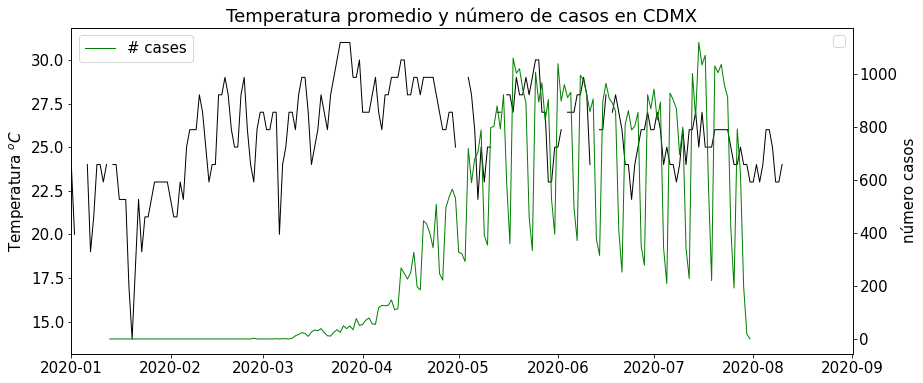

In [22]:
#Gráfica de contaminantes y casos
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(14, 6)) 
tit = 'Temperatura promedio y número de casos en CDMX'
ax1 = ax 
ax1.plot(num2date(time_final_temp), temp_max, lw=1, color='k')
ax1.legend(loc=1) 
ax2 = ax1.twinx()
ax2.plot(num2date(time_final_ct[1:]), cases_ciudad[1:], lw=1, color='g', label='# cases')
ax2.set_title(tit)
ax2.set_ylabel('número casos')
ax2.legend(loc=2) 
#ax.set_ylim(0, 280)
fi1 = date2num(datetime.datetime.strptime('2020-01', '%Y-%m'))
fi2 = date2num(datetime.datetime.strptime('2020-09', '%Y-%m'))
ax2.set_xlim(fi1, fi2)
ax1.set_ylabel('Temperatura $^oC$')
plt.savefig('Figura_Estado_CDMX_temp.png', bbox_inches='tight')

In [ ]:
#contaminantes

In [23]:
#Carga de contaminantes en CDMX
mat = np.loadtxt('/content/group_A_AlmaJair/datos_covid/contaminantes_cdmx_2020.csv', delimiter=',') 

In [24]:
# Tiempo en día/mes/año
month = mat[:, 1]
day = mat[:, 0]
year = mat[:, 2]
hour = mat[:, 3]
time = np.zeros(year.shape[0])
for ii in range(year.shape[0]):
    time[ii] = date2num(datetime.datetime(np.int(year[ii] + 2000), np.int(month[ii]),
                         np.int(day[ii]), np.int(hour[ii])))

In [25]:
o3 = np.ma.masked_invalid(mat[:, 5]) 
pm25 = np.ma.masked_invalid(mat[:, 6])
temp = np.ma.masked_invalid(mat[:, 7]) 

In [26]:
lin2 = np.int(np.floor((o3.shape[0]/24)))
lin = np.int(o3.shape[0] - lin2 * 24)

In [27]:
# Máximo diario
time_day = np.reshape(time[:-lin], (lin2, 24)).mean(1)
o3_day = np.reshape(o3[:-lin], (lin2, 24)) 
pm25_day = np.reshape(pm25[:-lin], (lin2, 24))

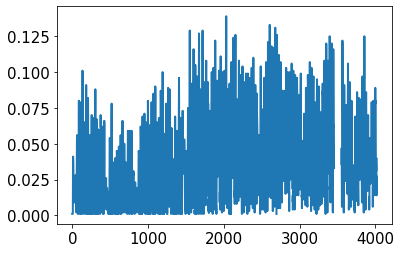

In [28]:
plt.plot(pm25)


In [29]:
# pm2.5 se necesita un mínimo de 75% de datos para sacar promedio
# Ozono se necesita un mínimo de 75% de datos para sacar promedio

In [30]:
for ii in range(pm25_day.shape[0]):
   if (pm25_day[ii, ~pm25_day[ii, :].mask].size) < 18:
    pm25_day[ii, :] = np.ma.masked

In [31]:
for ii in range(o3_day.shape[0]):
  if (o3_day[ii, ~o3_day[ii, :].mask].size) < 18:
    o3_day[ii, :] = np.ma.masked
    print(ii)

35
36
167
168
169


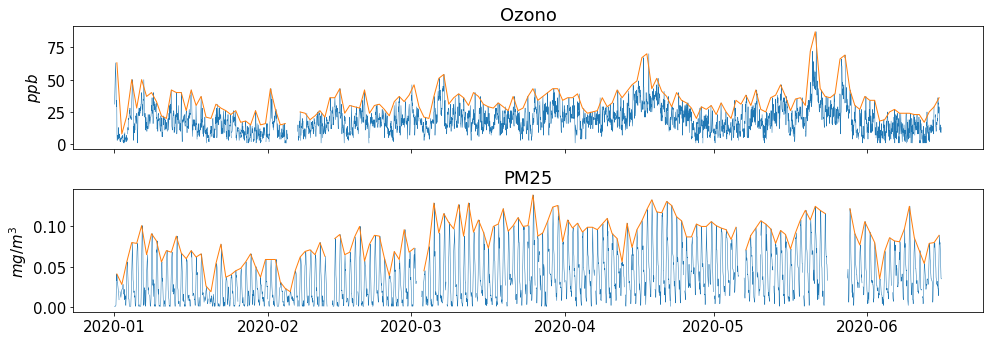

In [35]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(14, 5))
ax = axs[0]
tit = 'Ozono'
units = '$ppb$' #partes por mil millones 
ax.plot(num2date(time), o3, lw=0.5)
ax.plot(num2date(time_day), o3_day.max(1), lw=1)
ax.set_title(tit)
ax.set_ylabel(units)

ax = axs[1]
tit = 'PM25'
units = '$mg/m^3$'
ax.plot(num2date(time), pm25, lw=0.5)
ax.plot(num2date(time_day), pm25_day.max(1), lw=1)
ax.set_title(tit)
ax.set_ylabel(units)

fi1 = date2num(datetime.datetime.strptime('2020-01', '%Y-%m'))
fi2 = date2num(datetime.datetime.strptime('2020-06', '%Y-%m'))
plt.tight_layout()
plt.savefig('pollutants_raw.png', bbox_inches='tight')

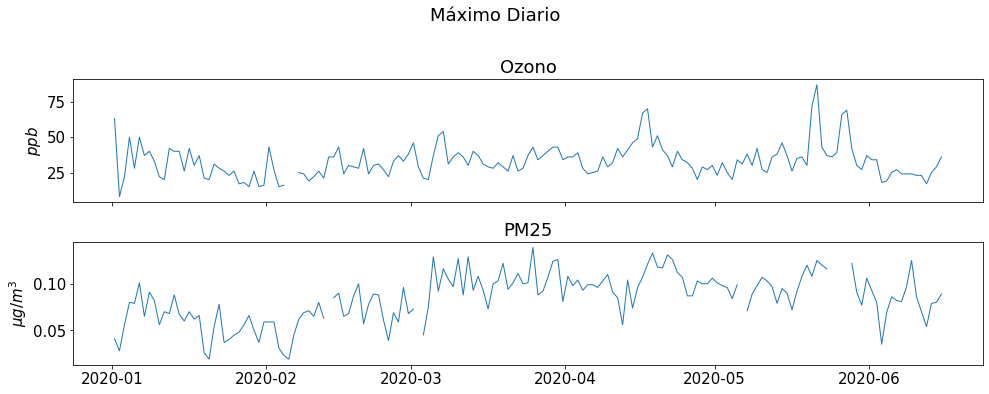

In [37]:
#Máximo diario
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(14, 5))
ax = axs[0]
tit = 'Ozono'
units = '$ppb$'
ax.plot(num2date(time_day), o3_day.max(1), lw=1)
ax.set_title(tit)
ax.set_ylabel(units)

ax = axs[1]
tit = 'PM25'
units = '$\mu g/m^3$'
ax.plot(num2date(time_day), pm25_day.max(1), lw=1)
ax.set_title(tit)
ax.set_ylabel(units)

fig.suptitle('Máximo Diario', y=1.1)
plt.tight_layout()
plt.savefig('daily_max_pollutants.png', bbox_inches='tight')

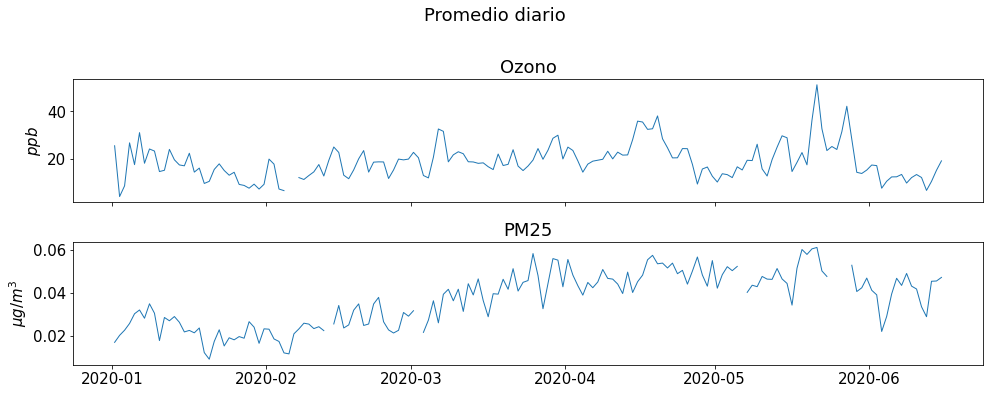

In [39]:
fig, axs = plt.subplots(2, 1, sharex=True, figsize=(14, 5))
ax = axs[0]
tit = 'Ozono'
units = '$ppb$'
ax.plot(num2date(time_day), o3_day.mean(1), lw=1)
ax.set_title(tit)
ax.set_ylabel(units)

ax = axs[1]
tit = 'PM25'
units = '$\mu g/m^3$'
ax.plot(num2date(time_day), pm25_day.mean(1), lw=1)
ax.set_title(tit)
ax.set_ylabel(units)

fig.suptitle('Promedio diario', y=1.1)
plt.tight_layout()
plt.savefig('daily_mean_pollutants.png', bbox_inches='tight')

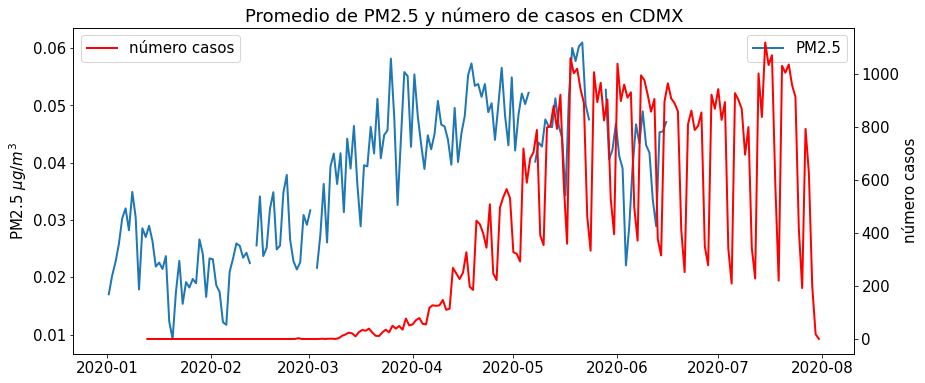

In [42]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(14, 6))
tit = 'Promedio de PM2.5 y número de casos en CDMX' 
ax1 = ax
ax1.plot(num2date(time_day), pm25_day.mean(1), lw=2, label = 'PM2.5')

ax1.legend(loc=1)
ax2 = ax1.twinx()
ax2.plot(num2date(time_final_ct[1:]), cases_ciudad[1:], lw=2, color='r', label='número casos')
ax2.set_title(tit)
ax2.set_ylabel('número casos')
ax2.legend(loc=2)

fi1 = date2num(datetime.datetime.strptime('2020-01', '%Y-%m'))
fi2 = date2num(datetime.datetime.strptime('2020-09', '%Y-%m'))

ax1.set_ylabel('PM2.5 $\mu g/m^3$')
plt.savefig('Figura_CDMX_pm25.png', bbox_inches='tight')

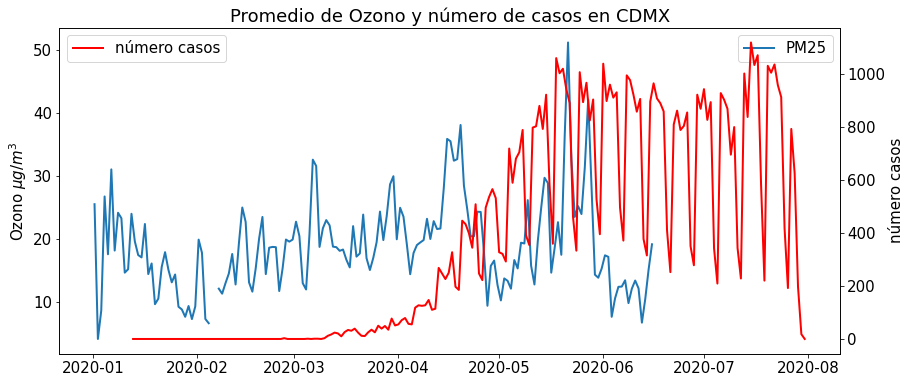

In [41]:
fig, ax = plt.subplots(1, 1, sharex=True, figsize=(14, 6))
tit = 'Promedio de Ozono y número de casos en CDMX' 
ax1 = ax
ax1.plot(num2date(time_day), o3_day.mean(1), lw=2, label = 'PM25')

ax1.legend(loc=1)
ax2 = ax1.twinx()
ax2.plot(num2date(time_final_ct[1:]), cases_ciudad[1:], lw=2, color='r', label='número casos')
ax2.set_title(tit)
ax2.set_ylabel('número casos')
ax2.legend(loc=2)

fi1 = date2num(datetime.datetime.strptime('2020-01', '%Y-%m'))
fi2 = date2num(datetime.datetime.strptime('2020-09', '%Y-%m'))

ax1.set_ylabel('Ozono $\mu g/m^3$')
plt.savefig('Figura_CDMX_ozono.png', bbox_inches='tight')